In [1]:
import torch.optim as optim
from utils import torch, cuda, plot_dataset_sample, test, train, plot_model_performance, plot_incorrect_preds
from dataset import get_loader, dataset_mean, dataset_std
from model import nn, S8Model
from torchsummary import summary

CUDA Available? False


In [2]:
batch_size = 64

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

train_loader, test_loader = get_loader(**kwargs)


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


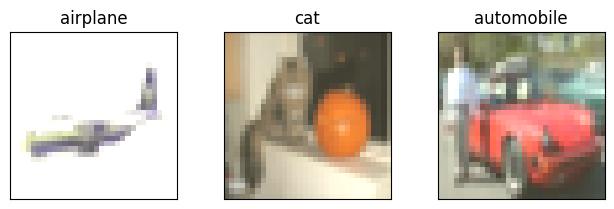

In [3]:
plot_dataset_sample(test_loader, dataset_mean, dataset_std)

In [4]:
device = torch.device("cuda" if cuda else "cpu")
model = S8Model(16, norm='gn').to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 32, 32]             280
         GroupNorm-2           [-1, 10, 32, 32]              20
         Dropout2d-3           [-1, 10, 32, 32]               0
            Conv2d-4           [-1, 10, 32, 32]             910
         GroupNorm-5           [-1, 10, 32, 32]              20
         Dropout2d-6           [-1, 10, 32, 32]               0
            Conv2d-7            [-1, 5, 32, 32]              55
         MaxPool2d-8            [-1, 5, 16, 16]               0
            Conv2d-9           [-1, 20, 16, 16]             920
        GroupNorm-10           [-1, 20, 16, 16]              40
        Dropout2d-11           [-1, 20, 16, 16]               0
           Conv2d-12           [-1, 20, 16, 16]           3,620
        GroupNorm-13           [-1, 20, 16, 16]              40
        Dropout2d-14           [-1, 20,

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()
  
plot_incorrect_preds(dataset_mean, dataset_std, 15)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=1.8758 Batch_id=781 Accuracy=28.19: 100%|██████████| 782/782 [01:24<00:00,  9.28it/s]


Test set: Average loss: 1.6342, Accuracy: 3797/10000 (37.97%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=1.2756 Batch_id=781 Accuracy=44.48: 100%|██████████| 782/782 [01:46<00:00,  7.36it/s]


Test set: Average loss: 1.4120, Accuracy: 4708/10000 (47.08%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=1.2898 Batch_id=781 Accuracy=51.80: 100%|██████████| 782/782 [01:33<00:00,  8.34it/s]


Test set: Average loss: 1.2154, Accuracy: 5522/10000 (55.22%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=1.0462 Batch_id=781 Accuracy=56.18: 100%|██████████| 782/782 [01:25<00:00,  9.15it/s]


Test set: Average loss: 1.1616, Accuracy: 5719/10000 (57.19%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=1.1962 Batch_id=781 Accuracy=59.25: 100%|██████████| 782/782 [01:21<00:00,  9.57it/s]


Test set: Average loss: 1.1219, Accuracy: 5909/10000 (59.09%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=1.1105 Batch_id=781 Accuracy=61.13: 100%|██████████| 782/782 [01:28<00:00,  8.84it/s]


Test set: Average loss: 1.0184, Accuracy: 6273/10000 (62.73%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.9196 Batch_id=781 Accuracy=62.66: 100%|██████████| 782/782 [01:23<00:00,  9.40it/s]


Test set: Average loss: 1.0593, Accuracy: 6166/10000 (61.66%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 8


Train: Loss=0.7919 Batch_id=781 Accuracy=66.54: 100%|██████████| 782/782 [01:24<00:00,  9.24it/s]


Test set: Average loss: 0.9279, Accuracy: 6632/10000 (66.32%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 9


Train: Loss=0.8645 Batch_id=781 Accuracy=67.02: 100%|██████████| 782/782 [01:22<00:00,  9.44it/s]


Test set: Average loss: 0.9211, Accuracy: 6656/10000 (66.56%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 10


Train: Loss=1.0614 Batch_id=781 Accuracy=67.46: 100%|██████████| 782/782 [01:23<00:00,  9.36it/s]


Test set: Average loss: 0.9098, Accuracy: 6690/10000 (66.90%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 11


Train: Loss=0.9011 Batch_id=781 Accuracy=67.76: 100%|██████████| 782/782 [01:24<00:00,  9.26it/s]


Test set: Average loss: 0.9076, Accuracy: 6679/10000 (66.79%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 12


Train: Loss=1.1397 Batch_id=781 Accuracy=67.99: 100%|██████████| 782/782 [01:23<00:00,  9.34it/s]


Test set: Average loss: 0.9145, Accuracy: 6708/10000 (67.08%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 13


Train: Loss=0.8401 Batch_id=781 Accuracy=68.22: 100%|██████████| 782/782 [01:24<00:00,  9.23it/s]


Test set: Average loss: 0.9095, Accuracy: 6691/10000 (66.91%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 14


Train: Loss=1.1220 Batch_id=781 Accuracy=68.34: 100%|██████████| 782/782 [01:23<00:00,  9.36it/s]


Test set: Average loss: 0.9080, Accuracy: 6717/10000 (67.17%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 15


Train: Loss=0.9793 Batch_id=105 Accuracy=67.47:  14%|█▎        | 106/782 [00:15<01:16,  8.88it/s]

In [ ]:
plot_model_performance()